In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

**BHK**: Number of Bedrooms, Hall, Kitchen.

**Rent**: Rent of the Houses/Apartments/Flats.

**Size**: Size of the Houses/Apartments/Flats in Square Feet.

**Floor**: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

**Area Type**: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

**Area Locality**: Locality of the Houses/Apartments/Flats.

**City**: City where the Houses/Apartments/Flats are Located.

**Furnishing Status**: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

**Tenant Preferred**: Type of Tenant Preferred by the Owner or Agent.

**Bathroom**: Number of Bathrooms.

**Point of Contact**: Whom should you contact for more information regarding the Houses/Apartments/Flats

In [2]:
df1=pd.read_csv("House_Rent_Dataset.csv")
df=df1.copy()
df_i=df1.copy()
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Here we have identify that :

Predictor **"Posted On"** has no information content because:
*   Posted on is the date when the listing is posted will not influence the rent significantaly.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


##b)Identify attributes/predictors that have no information content using statistical information or heuristics.

In [4]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
numerical_col=df.select_dtypes(include="number").columns #divide the numerical and categorical columns
cat_col=df.select_dtypes(include="object").columns
feat=[]
Val=[]
for i in numerical_col:
  variance=round((np.var(df[i])),2)
  feat.append(i)
  Val.append(variance)
Var_df=pd.DataFrame({"Features":feat,"Variance":Val})
Var_df

,Features,Variance
0,BHK,0.69
1,Rent,6099326320.17
2,Size,402127.84
3,Bathroom,0.78


For numerical columns We have checked variance of individual predictors and observe that No near-zero variance attributes detected here.

In [67]:
for i in cat_col:
  val_count=round(df[i].value_counts(normalize=True),3) # calculate the proportions of every category of each column
  print()
  print(val_count)



Floor
Others            0.28
1 out of 2        0.08
Ground out of 2   0.07
2 out of 3        0.07
2 out of 4        0.07
1 out of 3        0.06
3 out of 4        0.05
Ground out of 3   0.04
1 out of 4        0.04
Ground out of 1   0.04
1 out of 1        0.03
2 out of 2        0.03
Ground out of 4   0.02
2 out of 5        0.02
3 out of 3        0.02
1 out of 5        0.02
4 out of 5        0.02
3 out of 5        0.02
4 out of 4        0.01
Name: proportion, dtype: float64

Area Type
Super Area    0.52
Carpet Area   0.48
Others        0.00
Name: proportion, dtype: float64

Area Locality
Others   1.00
Name: proportion, dtype: float64

City
Mumbai      0.20
Chennai     0.19
Bangalore   0.19
Hyderabad   0.18
Delhi       0.13
Kolkata     0.11
Name: proportion, dtype: float64

Furnishing Status
Semi-Furnished   0.47
Unfurnished      0.38
Furnished        0.14
Name: proportion, dtype: float64

Tenant Preferred
Bachelors/Family   0.73
Bachelors          0.17
Family             0.10
Name: propo

**After calculating the proportion of every category we obseved that**

1. Tenant Preferred
2. Area Type

**one category's proportion of these predictor is very much high than other category so these predictors have very low information content in our dataset**

**There are so many very low proportion categories in features, So we will use category binning method.**

##c)Impute missing values if any.

In [8]:
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


After checking for missing value dataset has no missing values.

In [9]:
cat_col=df.drop(["Posted On"],axis=1).select_dtypes(include="object").columns
for i in cat_col:
  count = df[i].value_counts() / len(df) * 100
  threshold = 1
  df[i] = df[i].apply(lambda x: x if count[x] >= threshold else "Others")


df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Others,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,Others,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Others,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Others,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,Others,Kolkata,Unfurnished,Bachelors,1,Contact Owner


**Perform category binning for the 'Category' feature to combine rare categories into an 'Other' category.The original dataset contains categories with observations less than 1%. These infrequent categories do not contribute much to the model's predictive power and could lead to overfitting. By grouping them into an 'Other' category, we reduce model complexity, improve generalization, and maintain interpretability.**

##d)Identify and remove outliers using univariate methods.

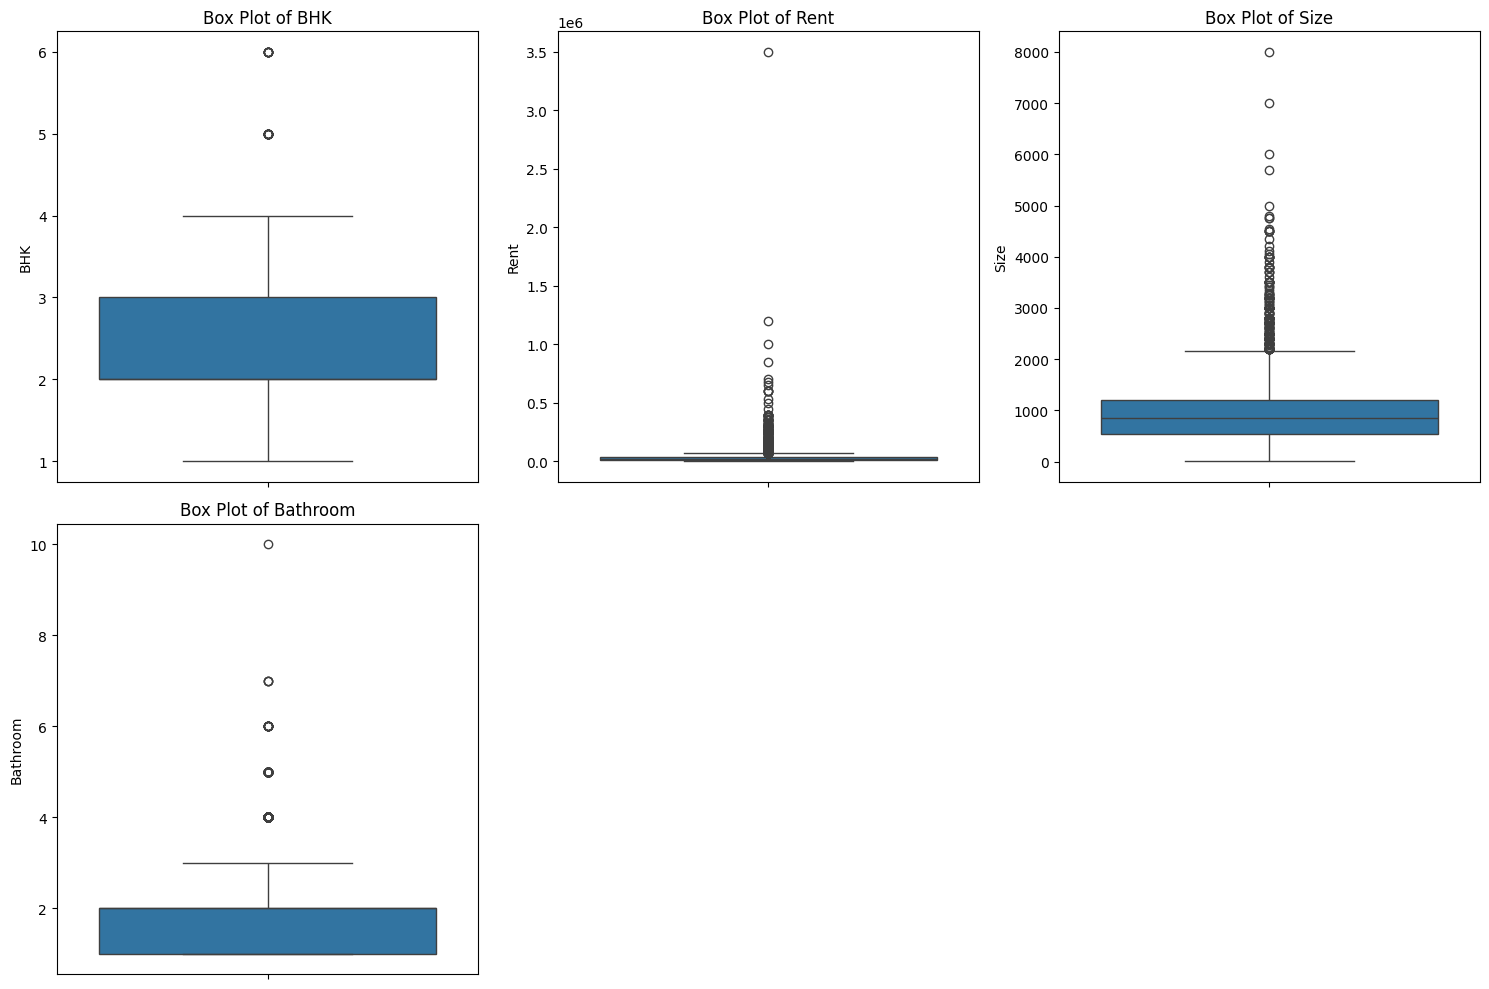

In [10]:
df_num_col = df.select_dtypes(include="number").columns #Plotting box plot of numerical columns
num_columns = len(df_num_col)
nrows = (num_columns // 3) + (num_columns % 3 > 0)
ncols = min(num_columns, 3)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(df_num_col):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

By plotting the box plots, we have identified the following predictors with **outliers**:
1. BHK
2. Rent
3. Size
4. Bathroom


In [11]:
def outliers_detail(df, df_num_col):
    lower_lim = []
    upper_lim = []
    outlier_num = []
    out_per=[]
    for col in df_num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_lim = round((Q1 - 1.5 * IQR), 0)
        Upper_lim = round((Q3 + 1.5 * IQR), 0)
        lower_lim.append(Lower_lim)
        upper_lim.append(Upper_lim)
        outliers_in_column = df[(df[col] < Lower_lim) | (df[col] > Upper_lim)]
        outlier_num.append(len(outliers_in_column))
        out_per.append(round(len(outliers_in_column)/len(df),3)*100)
    outlier_df = pd.DataFrame({
        'Column': df_num_col,
        'Lower Limit': lower_lim,
        'Upper Limit': upper_lim,
        'No of Outliers': outlier_num,
        "Outlier(%)":out_per
    })

    return outlier_df



outliers_detail(df,df.select_dtypes(include="number").columns)

,Column,Lower Limit,Upper Limit,No of Outliers,Outlier(%)
0,BHK,0.00,4.00,27,0.60
1,Rent,-24500.00,67500.00,520,11.00
2,Size,-425.00,2175.00,203,4.30
3,Bathroom,-0.00,4.00,76,1.60


**Here we have saw that the predictors are having greater than 5 percent outliers:**
*   BHK
*  Rent
*   Size
*   Bathroom





In [12]:
def outliers(df, df_num_col):
  outlier_indices = set()
  for i in df_num_col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    Lower_lim = round((Q1 - 1.5 * IQR), 0)
    Upper_lim = round((Q3 + 1.5 * IQR), 0)
    outlier_idx = df[(df[i] < Lower_lim) | (df[i] > Upper_lim)].index
    outlier_indices.update(outlier_idx)
  df_filt = df.drop(index=outlier_indices)
  df_filt.reset_index(drop=True,inplace=True)
  return df_filt

df_filt=outliers(df,df.select_dtypes(include="number").columns)
df_filt1=outliers(df_i,df.select_dtypes(include="number").columns)
outliers_detail(df_filt,df.select_dtypes(include="number").columns)

,Column,Lower Limit,Upper Limit,No of Outliers,Outlier(%)
0,BHK,-0.00,4.00,0,0.00
1,Rent,-12250.00,45750.00,249,6.00
2,Size,-400.00,2000.00,16,0.40
3,Bathroom,-0.00,4.00,0,0.00


**After removing the outliers we have saw that all the predictor reach outlier percentage less than 6 percent**

##(e) Identify skewness in features and apply transformation if required. Compute skewness again. Write your observation.

In [13]:
skewness={}                            #Checking the Skewness of data
for i in df_num_col:
  s=df[i].skew()
  skewness[i]=s

feature=[]
Val=[]
Skew_type=[]
for key, value in skewness.items():
  feature.append(key)
  Val.append(value)
  t=1
  if value>0.5:
    t=2
  if value<-0.5:
    t=3
  if t==1:
    ty="Normal"
  if t==2:
    ty="Positively skewed"
  if t==3:
    ty="Negatively Skewed"
  Skew_type.append(ty)
Skew_df=pd.DataFrame({"Feature":feature,"Skewness":Val,"Nature":Skew_type})
Skew_df

,Feature,Skewness,Nature
0,BHK,0.60,Positively skewed
1,Rent,21.41,Positively skewed
2,Size,2.30,Positively skewed
3,Bathroom,1.27,Positively skewed


The features **BHK**, **Rent**, **Size**, and **Bathroom** exhibit positive skewness, with rent being highly skewed, indicating the presence of a few extremely high values that deviate significantly from the majority of the data.

In [14]:
Skew_norm=Skew_df[Skew_df["Nature"]=="Normal"]
Skew_pos=Skew_df[Skew_df["Nature"]=="Positively skewed"]
Skew_neg=Skew_df[Skew_df["Nature"]=="Negatively Skewed"]

Skew_pos_col=list(Skew_pos["Feature"])
Skew_neg_col=list(Skew_neg["Feature"])

from sklearn.preprocessing import PowerTransformer                  #apply function transformation on skewed fetaures
trans=PowerTransformer()
df_trans=df.copy()
df_trans[Skew_pos_col]=trans.fit_transform(df[Skew_pos_col])

In [15]:
skewness={}                            #Comaprision on skewness Before and After Transformation
for i in df_num_col:
  s=df_trans[i].skew()
  skewness[i]=s

feature=[]
Val=[]
Skew_type=[]
for key, value in skewness.items():
  feature.append(key)
  Val.append(value)
  t=1
  if value>0.5:
    t=2
  if value<-0.5:
    t=3
  if t==1:
    ty="Normal"
  if t==2:
    ty="Positively skewed"
  if t==3:
    ty="Negatively Skewed"
  Skew_type.append(ty)
Skew_df_trans=pd.DataFrame({"Feature":feature,"Skewness After Transformation":Val,"Nature After Transformation":Skew_type})
pd.concat([Skew_df,Skew_df_trans.drop("Feature",axis=1)],axis=1)

,Feature,Skewness,Nature,Skewness After Transformation,Nature After Transformation
0,BHK,0.60,Positively skewed,-0.01,Normal
1,Rent,21.41,Positively skewed,0.03,Normal
2,Size,2.30,Positively skewed,0.08,Normal
3,Bathroom,1.27,Positively skewed,0.03,Normal


**After Applying Transformation, We have observed:**
*   All the Skewed Features became Normally distrubuted.




##(f) Visualize the data by creating scatter plots, and distribution plots. Write your observations about the data

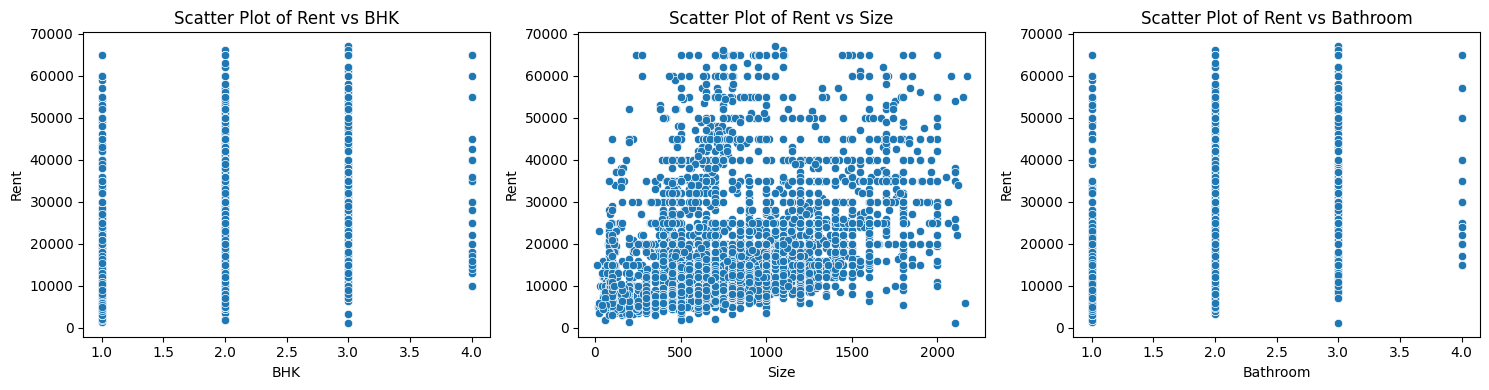

In [16]:
df_ind_col=df.drop(["Rent"],axis=1).select_dtypes(include="number").columns    #Plotting scatter plot of Target VS features
num_columns = len(df_ind_col)
nrows = (num_columns // 3) + (num_columns % 3 > 0)
ncols = min(num_columns, 3)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(df_ind_col):
    sns.scatterplot(data=df_filt1, x=col, y="Rent", ax=axes[i])
    axes[i].set_title(f'Scatter Plot of Rent vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Rent')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Scatter Plot of Rent vs BHK:**

1.  The rent values are spread across different BHK categories.
2. The distribution suggests that higher BHKs generally have higher rents, but there is significant overlap in rent values across different BHKs.
3. This indicates that BHK alone may not be a strong predictor of rent.

**Scatter Plot of Rent vs Size:**

1. There is a positive correlation between size and rent, meaning larger properties tend to have higher rents.
2. However, the relationship is not perfectly linear, indicating that other factors (such as location, amenities, or demand) also influence rent.

**Scatter Plot of Rent vs Bathroom:**

1. Similar to the BHK plot, rent varies across different bathroom counts, with higher bathroom counts generally leading to higher rents.

2. However, there is considerable overlap, meaning bathroom count alone does not fully explain rent variations.
  



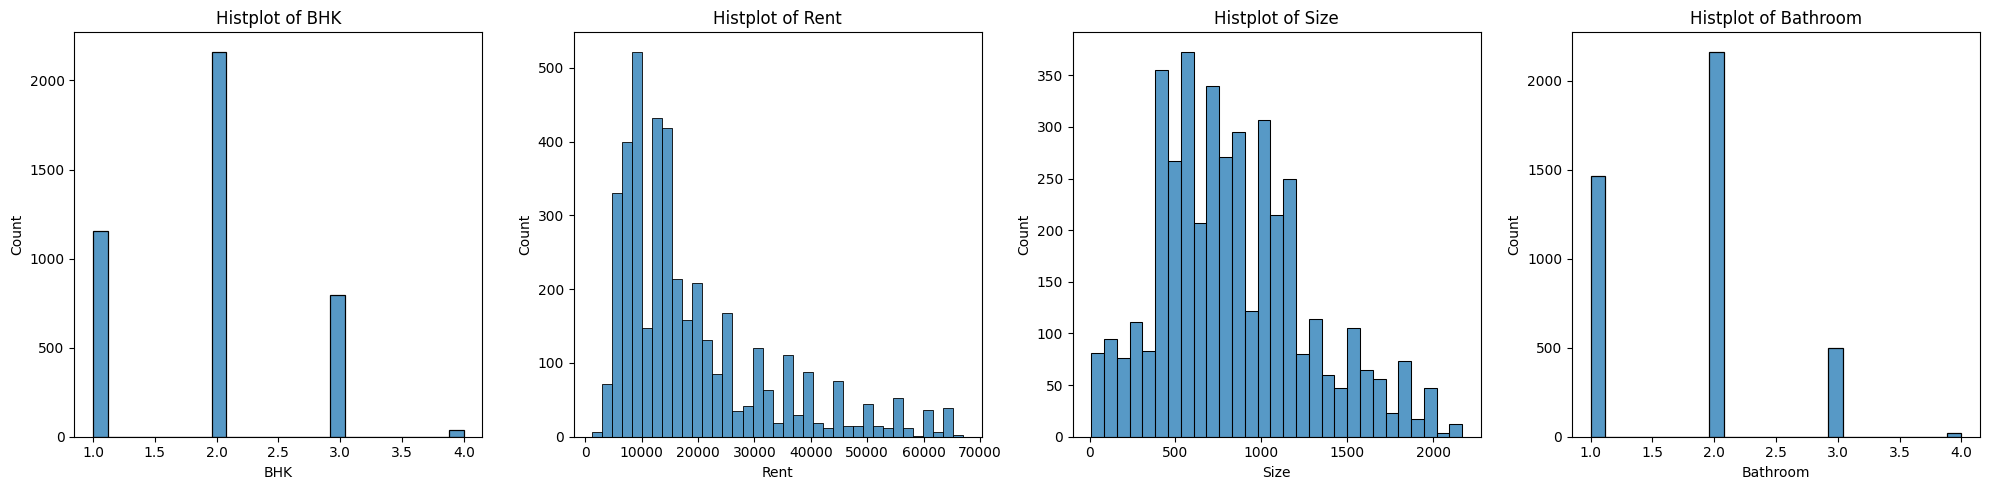

In [17]:
num_columns = len(df_num_col)                                            #Plotting histogram of fetaures
nrows = (num_columns // 4) + (num_columns % 4 > 0)
ncols = min(num_columns, 4)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(df_num_col):
    sns.histplot(df_filt1[col], ax=axes[i])
    axes[i].set_title(f'Histplot of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Histogram of BHK:**

1. The most common BHK categories are 2 BHK and 1 BHK, with 2 BHK being the highest.
2. 3 BHK is less frequent, and 4 BHK is very rare, indicating that higher BHK properties are not as commonly available in the dataset.
3. This suggests that most rental properties in the dataset cater to small to mid-sized families.

**Histogram of Rent:**

1. The distribution is right-skewed, meaning most properties have lower rents, while fewer properties have very high rents.
2. This suggests that luxury or premium rental properties are in the minority.
3. A long tail at higher rents indicates the presence of some expensive properties that could be outliers.

**Histogram of Size:**

1. The size distribution shows a peak around 500-1000 sq. ft, suggesting that most properties are of moderate size.
2. There is a long tail, indicating a few large-sized properties, but they are less common.
3. The distribution is not perfectly normal, implying variations in property sizes across different regions.

**Histogram of Bathroom:**

1. 2 bathrooms are the most common, followed by 1 bathroom.
2. 3 and 4 bathrooms are much less frequent, similar to the BHK trend.
3. This aligns with the idea that most properties in the dataset are small to mid-sized homes rather than luxury villas or large apartments.


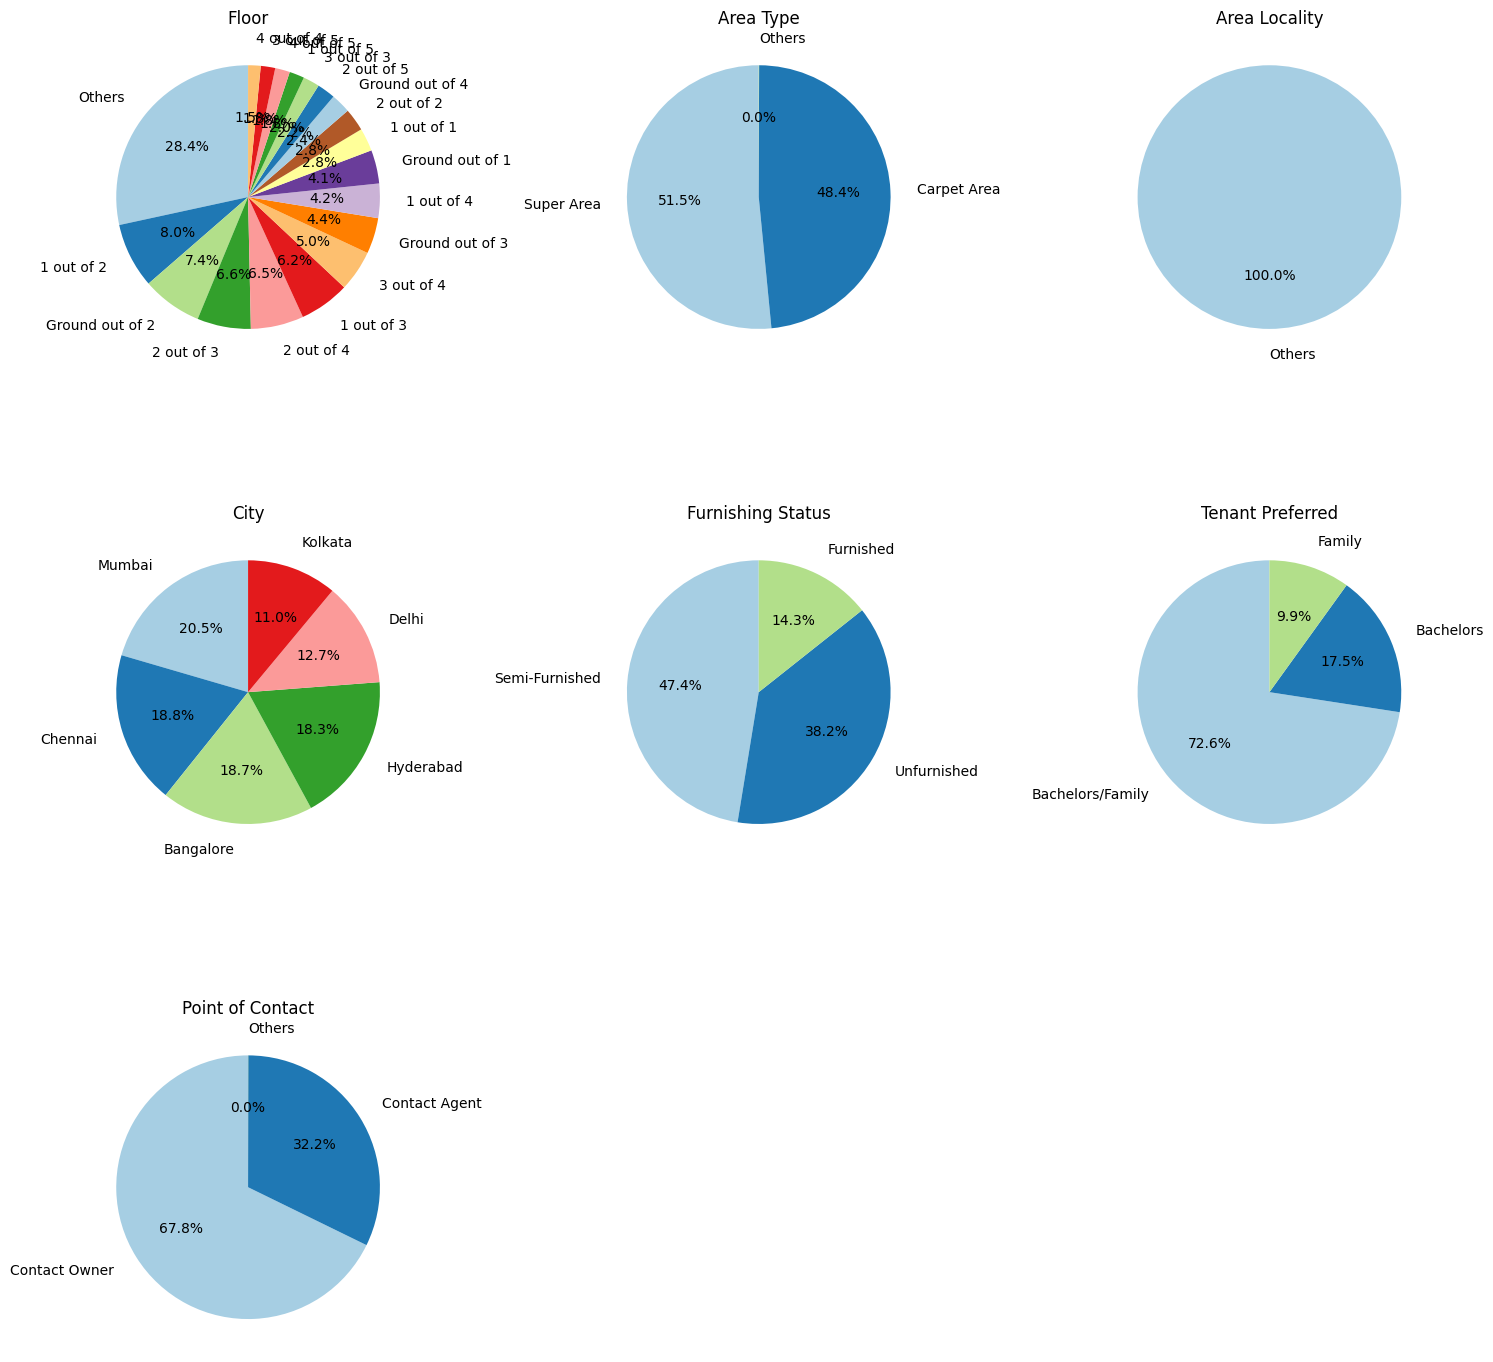

In [18]:
df_cat_col=df.select_dtypes(include="object").columns                             #Pie chart of categorical features
num_columns = len(df_cat_col[1:])
nrows = (num_columns // 3) + (num_columns % 3 > 0)
ncols = min(num_columns, 3)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()
for i, col in enumerate(df_cat_col[1:]):
  axes[i].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%', startangle=90,
            labeldistance=1.2,colors=plt.cm.Paired.colors)
  axes[i].set_title(f'{col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


- Majority of properties are on floors grouped as "1 out of 2","Ground out of 2" and "2 out of 3".
- Area type is almost evenly split between Super Area (**51.5%**) and Carpet Area (**48.4%**).  
- Mumbai has the highest share of properties (**20.5%**), followed by Bangalore (**18.7%**), Chennai (**18.8%**), and Hyderabad (**18.3%**).  
- Semi-furnished properties dominate (**47.4%**), followed by unfurnished (**38.2%**) and furnished (**14.3%**).  
- Families are preferred tenants for **72.6%** of properties, with bachelors preferred in **17.5%** of cases.  
- Most properties are managed directly by owners (**67.8%**), while agents handle **32.2%**.

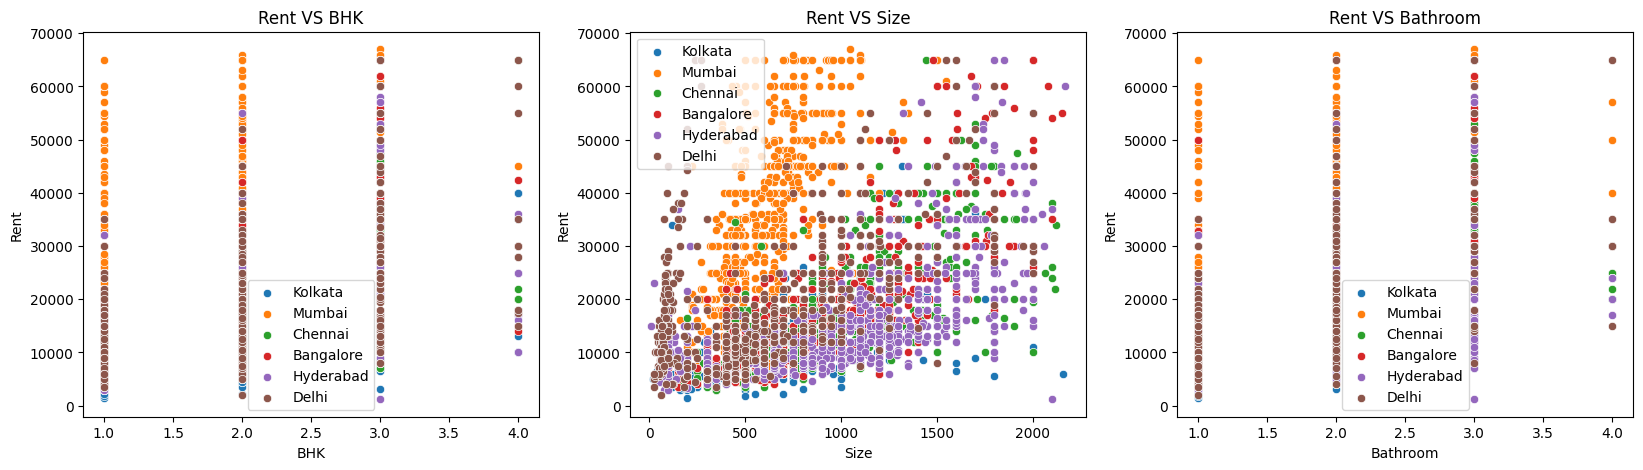

In [19]:
df_k=df_filt[df_filt["City"]=="Kolkata"]
df_m=df_filt[df_filt["City"]=="Mumbai"]
df_c=df_filt[df_filt["City"]=="Chennai"]
df_h=df_filt[df_filt["City"]=="Bangalore"]
df_b=df_filt[df_filt["City"]=="Hyderabad"]
df_d=df_filt[df_filt["City"]=="Delhi"]

plt.figure(figsize=(20,5))                                               #Plotting scatter plot of Efficiency Vs horsepower,weight and length features
plt.subplot(131)
sns.scatterplot(data=df_k,y="Rent",x="BHK",label="Kolkata")
sns.scatterplot(data=df_m,y="Rent",x="BHK",label="Mumbai")
sns.scatterplot(data=df_c,y="Rent",x="BHK",label="Chennai")
sns.scatterplot(data=df_h,y="Rent",x="BHK",label="Bangalore")
sns.scatterplot(data=df_b,y="Rent",x="BHK",label="Hyderabad")
_=sns.scatterplot(data=df_d,y="Rent",x="BHK",label="Delhi")
plt.title("Rent VS BHK")

plt.subplot(132)
sns.scatterplot(data=df_k,y="Rent",x="Size",label="Kolkata")
sns.scatterplot(data=df_m,y="Rent",x="Size",label="Mumbai")
sns.scatterplot(data=df_c,y="Rent",x="Size",label="Chennai")
sns.scatterplot(data=df_h,y="Rent",x="Size",label="Bangalore")
sns.scatterplot(data=df_b,y="Rent",x="Size",label="Hyderabad")
_=sns.scatterplot(data=df_d,y="Rent",x="Size",label="Delhi")
plt.title("Rent VS Size")

plt.subplot(133)
sns.scatterplot(data=df_k,y="Rent",x="Bathroom",label="Kolkata")
sns.scatterplot(data=df_m,y="Rent",x="Bathroom",label="Mumbai")
sns.scatterplot(data=df_c,y="Rent",x="Bathroom",label="Chennai")
sns.scatterplot(data=df_h,y="Rent",x="Bathroom",label="Bangalore")
sns.scatterplot(data=df_b,y="Rent",x="Bathroom",label="Hyderabad")
_=sns.scatterplot(data=df_d,y="Rent",x="Bathroom",label="Delhi")
_=plt.title("Rent VS Bathroom")


- **Rent vs BHK:** Rent increases with BHK, but significant rent differences are seen mainly up to 2-3 BHKs, especially in Mumbai and Bangalore.  
- **Rent vs Size:** Larger properties generally have higher rents, with Mumbai showing higher rents compared to other cities for similar sizes.  
- **Rent vs Bathroom:** Rent rises with the number of bathrooms, but most high rents are concentrated in properties with 2-3 bathrooms, primarily in Mumbai and Bangalore.  

Rent is positively correlated with size, BHK, and bathrooms, with city-specific factors significantly affecting rent levels.

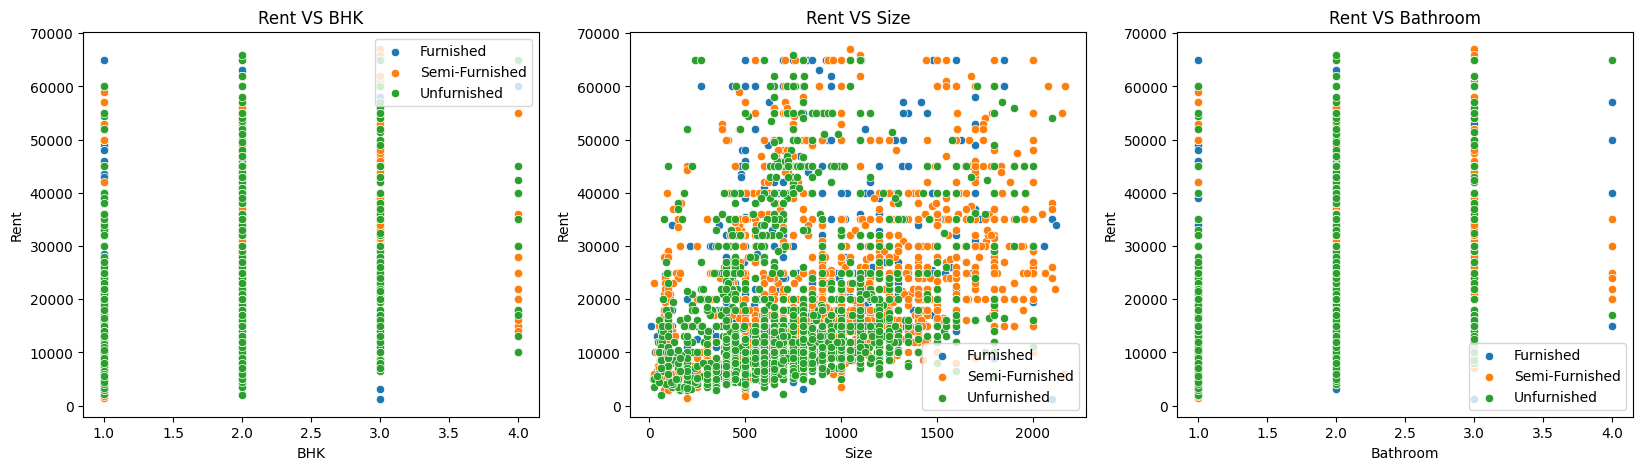

In [20]:
df_fur=df_filt[df_filt["Furnishing Status"]=="Furnished"]
df_sfur=df_filt[df_filt["Furnishing Status"]=="Semi-Furnished"]
df_ufur=df_filt[df_filt["Furnishing Status"]=="Unfurnished"]

plt.figure(figsize=(20,5))                                               #Plotting scatter plot of Efficiency Vs horsepower,weight and length features
plt.subplot(131)
sns.scatterplot(data=df_fur,y="Rent",x="BHK",label="Furnished")
sns.scatterplot(data=df_sfur,y="Rent",x="BHK",label="Semi-Furnished")
sns.scatterplot(data=df_ufur,y="Rent",x="BHK",label="Unfurnished")
plt.title("Rent VS BHK")

plt.subplot(132)
sns.scatterplot(data=df_fur,y="Rent",x="Size",label="Furnished")
sns.scatterplot(data=df_sfur,y="Rent",x="Size",label="Semi-Furnished")
sns.scatterplot(data=df_ufur,y="Rent",x="Size",label="Unfurnished")
plt.title("Rent VS Size")

plt.subplot(133)
sns.scatterplot(data=df_fur,y="Rent",x="Bathroom",label="Furnished")
sns.scatterplot(data=df_sfur,y="Rent",x="Bathroom",label="Semi-Furnished")
sns.scatterplot(data=df_ufur,y="Rent",x="Bathroom",label="Unfurnished")

_=plt.title("Rent VS Bathroom")


- **Rent vs BHK:** Rent increases with BHK, but the difference is less significant beyond 2-3 BHKs. Semi-furnished and unfurnished properties dominate across rent levels.

- **Rent vs Size:** Rent positively correlates with size. Semi-furnished and unfurnished properties are common at all rent levels, while furnished properties are seen at higher rents.

- **Rent vs Bathroom:** Rent generally increases with bathrooms. Unfurnished and semi-furnished properties dominate, but furnished ones are more visible in higher rent brackets.

Semi-furnished and unfurnished properties dominate across rent, BHK, and size categories, while furnished properties are more common in higher rent ranges.

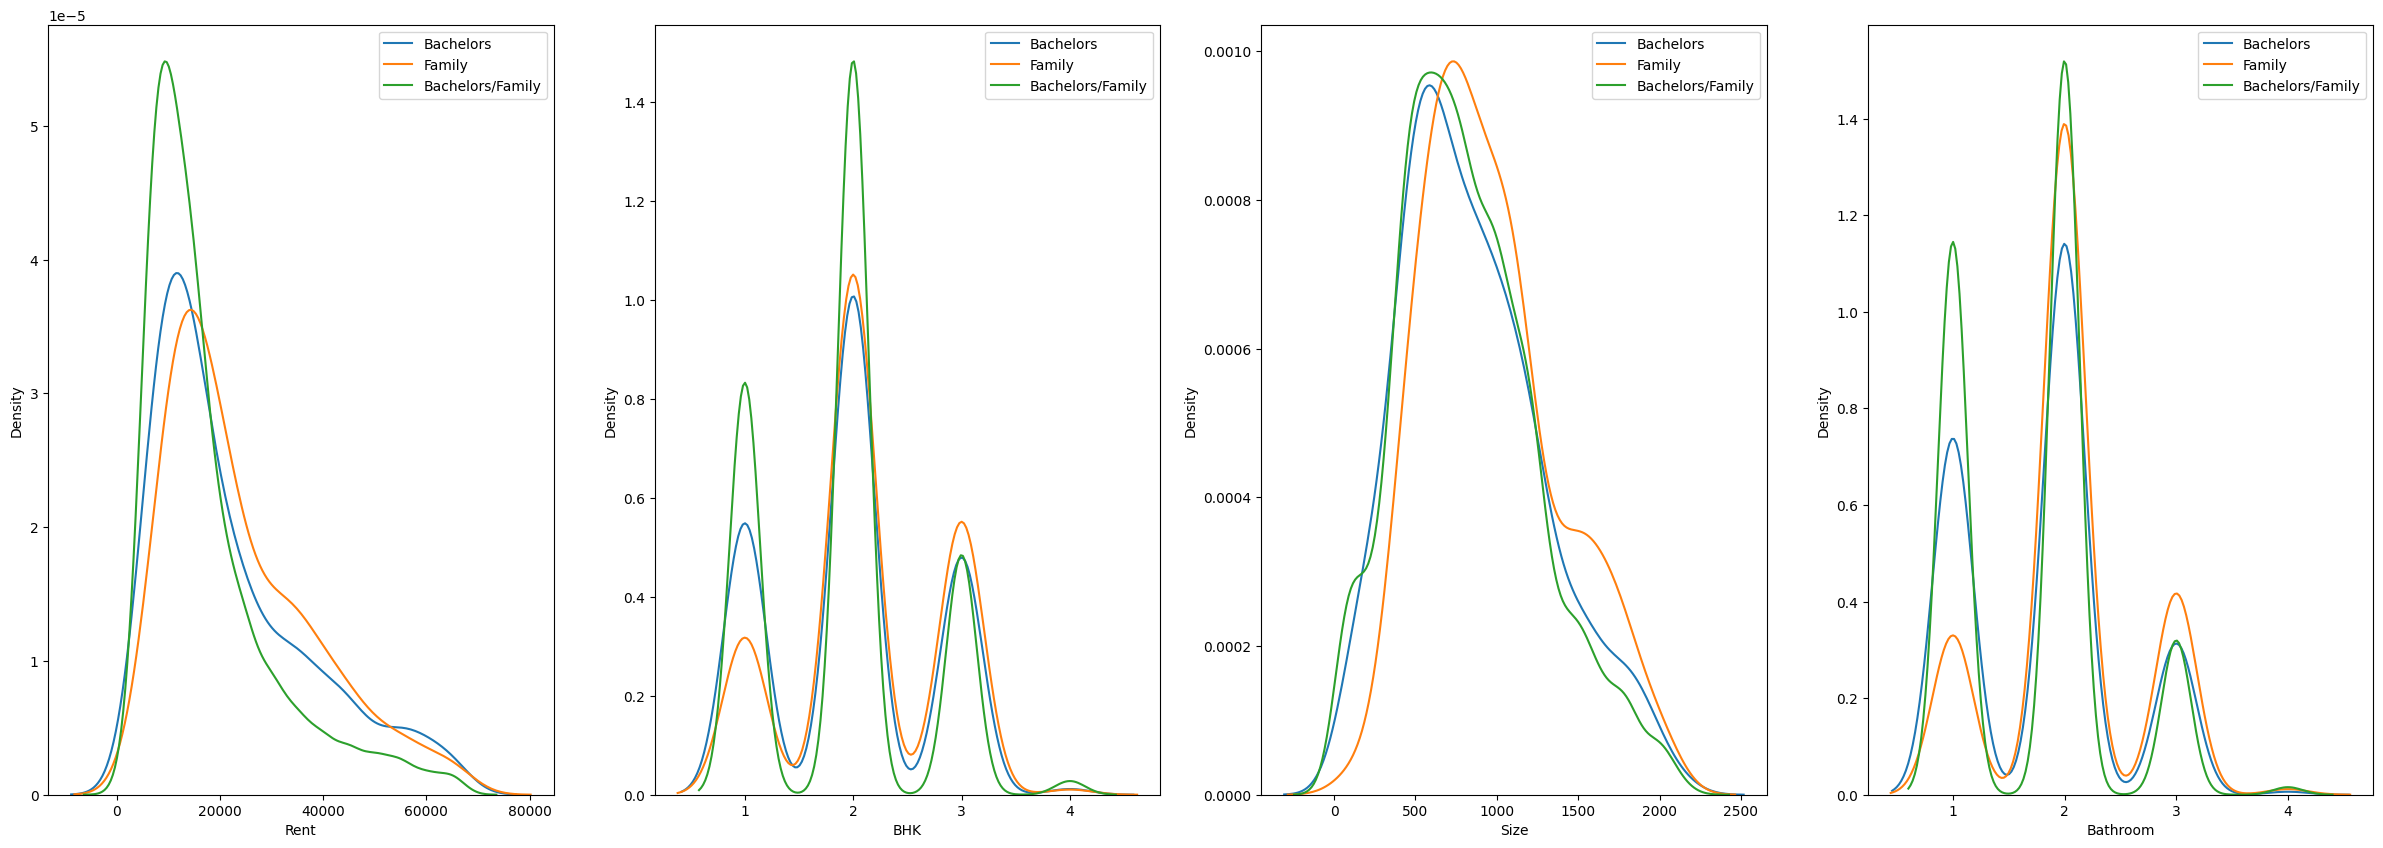

In [21]:
df_bech=df_filt[df_filt["Tenant Preferred"]=="Bachelors"]
df_fam=df_filt[df_filt["Tenant Preferred"]=="Family"]
df_both=df_filt[df_filt["Tenant Preferred"]=="Bachelors/Family"]

plt.figure(figsize=(30,10))                                               #Plotting scatter plot of Efficiency Vs horsepower,weight and length features
plt.subplot(141)
sns.distplot(df_bech["Rent"],hist=False,label="Bachelors")
sns.distplot(df_fam["Rent"],hist=False,label="Family")
sns.distplot(df_both["Rent"],hist=False,label="Bachelors/Family")
plt.legend()

plt.subplot(142)
sns.distplot(df_bech["BHK"],hist=False,label="Bachelors")
sns.distplot(df_fam["BHK"],hist=False,label="Family")
sns.distplot(df_both["BHK"],hist=False,label="Bachelors/Family")
plt.legend()

plt.subplot(143)
sns.distplot(df_bech["Size"],hist=False,label="Bachelors")
sns.distplot(df_fam["Size"],hist=False,label="Family")
sns.distplot(df_both["Size"],hist=False,label="Bachelors/Family")
plt.legend()

plt.subplot(144)
sns.distplot(df_bech["Bathroom"],hist=False,label="Bachelors")
sns.distplot(df_fam["Bathroom"],hist=False,label="Family")
sns.distplot(df_both["Bathroom"],hist=False,label="Bachelors/Family")
_=plt.legend()


- **Rent:** Families tend to rent properties with lower rents compared to bachelors or mixed preferences, but rent distribution is overall similar across groups.

- **BHK:** Properties with 2-3 BHKs are common across all tenant preferences, but families lean towards 2 BHKs more often.

- **Size:** Family-preferred properties are generally slightly smaller compared to properties rented by bachelors or mixed groups.

- **Bathroom:** Most properties have 1-2 bathrooms across all tenant preferences, with minimal variation in distribution.


Family-preferred properties generally have lower rents, smaller sizes, and fewer BHKs compared to those rented by bachelors or mixed tenants.

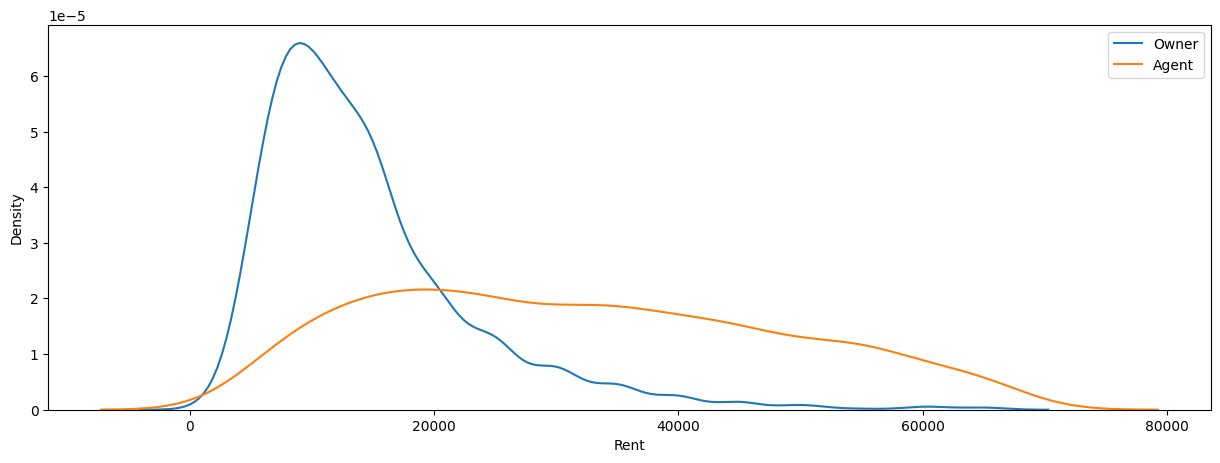

In [22]:
df_own=df_filt[df_filt["Point of Contact"]=="Contact Owner"]
df_agen=df_filt[df_filt["Point of Contact"]=="Contact Agent"]

plt.figure(figsize=(15,5))
sns.distplot(df_own["Rent"],hist=False,label="Owner")
sns.distplot(df_agen["Rent"],hist=False,label="Agent")
_=plt.legend()

- **Owner-Managed Properties:** Mostly concentrated in the lower rent range (below ₹20,000).  
- **Agent-Managed Properties:** Broad rent distribution, dominating higher rents (above ₹20,000).  


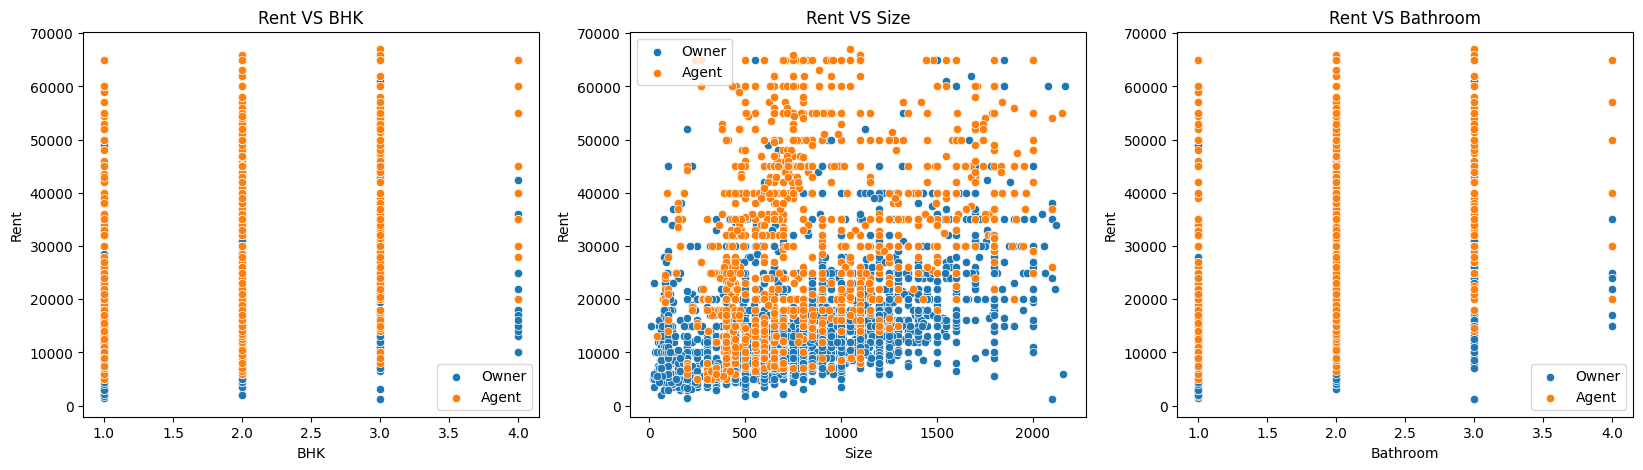

In [23]:
plt.figure(figsize=(20,5))                                               #Plotting scatter plot of Efficiency Vs horsepower,weight and length features
plt.subplot(131)
sns.scatterplot(data=df_own,y="Rent",x="BHK",label="Owner")
sns.scatterplot(data=df_agen,y="Rent",x="BHK",label="Agent")
plt.title("Rent VS BHK")

plt.subplot(132)
sns.scatterplot(data=df_own,y="Rent",x="Size",label="Owner")
sns.scatterplot(data=df_agen,y="Rent",x="Size",label="Agent")
plt.title("Rent VS Size")

plt.subplot(133)
sns.scatterplot(data=df_own,y="Rent",x="Bathroom",label="Owner")
sns.scatterplot(data=df_agen,y="Rent",x="Bathroom",label="Agent")
_=plt.title("Rent VS Bathroom")

**Agents handle most high-rent properties, while owners focus on lower-rent properties.**

##(g) Do One-Hot Encoding for the categorical predictors. How many predictors do you have after doing one hot encoding?

In [24]:
df_=df_filt1.drop(["Posted On"],axis=1)
from sklearn.preprocessing import OneHotEncoder               #import the onhotencoder class for one hot encoding
ohe=OneHotEncoder(drop="first",sparse_output=False)
df_f=ohe.fit_transform(df_[cat_col])
df_ohe=pd.DataFrame(df_f,columns=ohe.get_feature_names_out(cat_col)) #convert out dataset into dataframe because onhotencoding give in nd array
df_encoded_1=pd.concat([df_filt1.select_dtypes(include="number"),df_ohe],axis=1)
print(f"The Number of predictors after one hot encoding are {len(df_encoded_1.columns)}")

The Number of predictors after one hot encoding are 2328


**The number of features without capping are 2328.**

In [25]:
df_=df_filt.copy().drop(["Posted On"],axis=1)
from sklearn.preprocessing import OneHotEncoder               #import the onhotencoder class for one hot encoding
ohe=OneHotEncoder(drop="first",sparse_output=False)
df_f=ohe.fit_transform(df_[cat_col])
df_ohe=pd.DataFrame(df_f,columns=ohe.get_feature_names_out(cat_col)) #convert out dataset into dataframe because onhotencoding give in nd array
df_encoded_2=pd.concat([df_filt.select_dtypes(include="number"),df_ohe],axis=1)
print(f"The Number of predictors after one hot encoding are {len(df_encoded_2.columns)}")

The Number of predictors after one hot encoding are 35


**The number of features after capping are 35.**

##(h) Create a heatmap to visualize the correlation between all variable pairs

<Axes: >

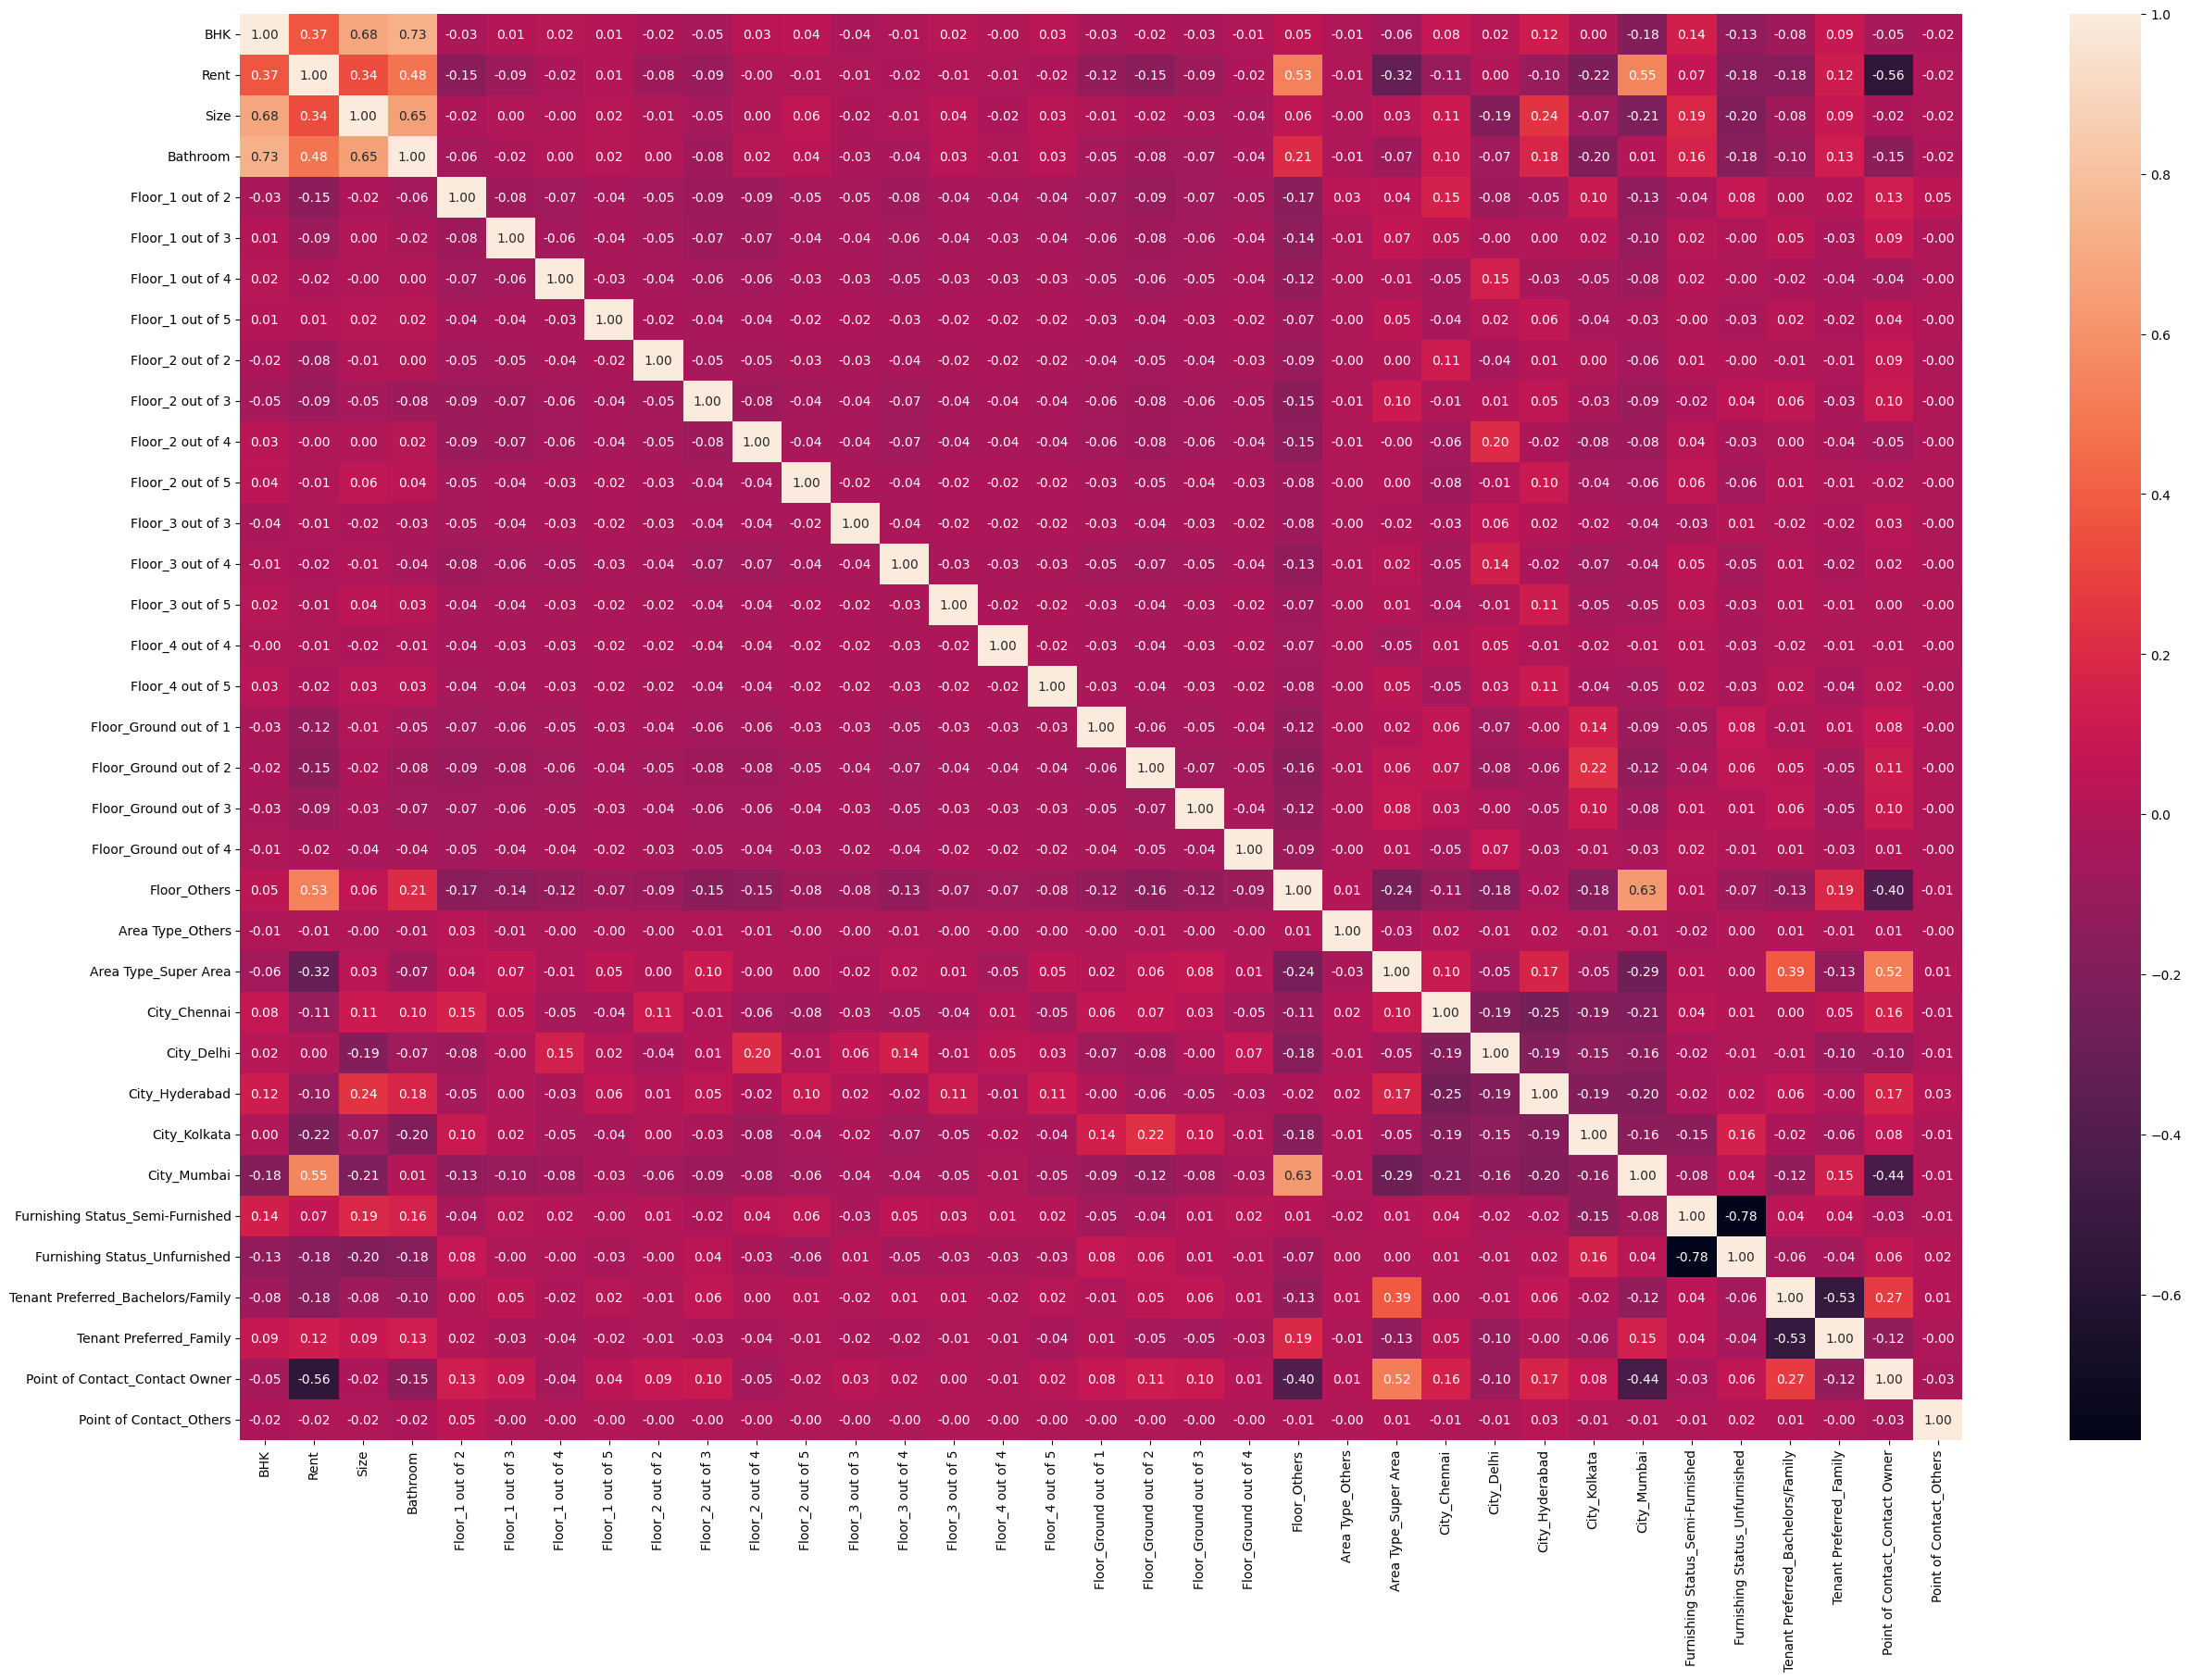

In [26]:
plt.figure(figsize=(30,20))
cor=df_encoded_2.corr()
sns.heatmap(cor,annot=True,fmt=".2f")

**We have used the Binned data to visualise correlation between features**

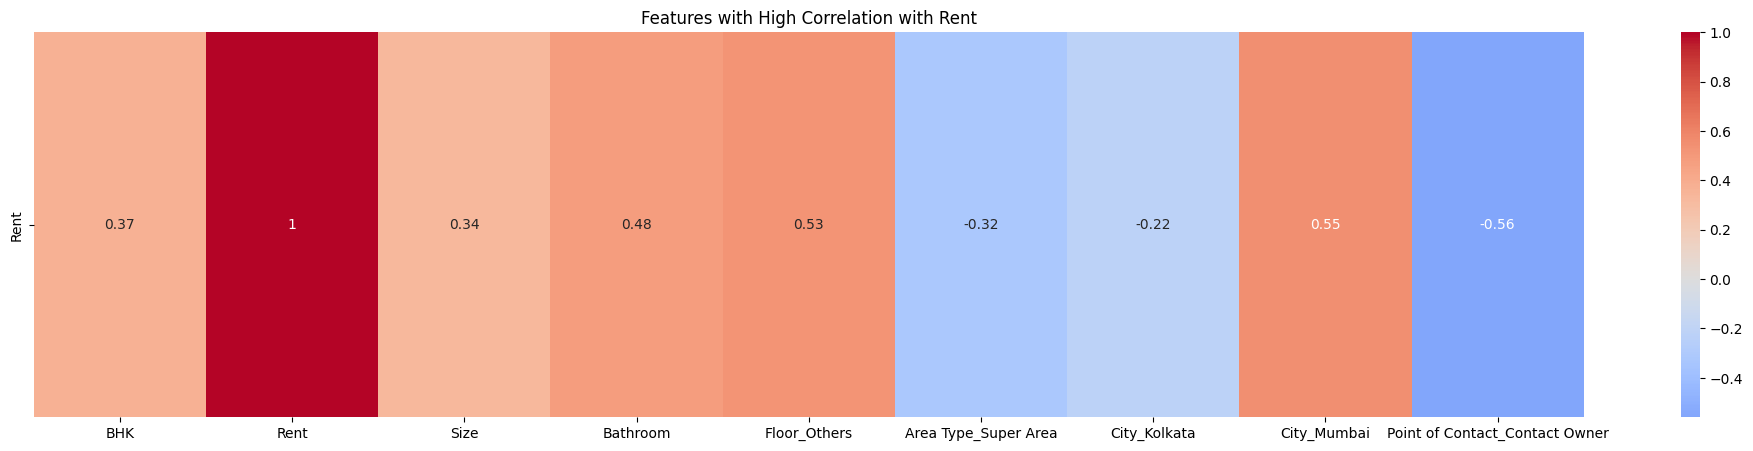

In [27]:
cor=df_encoded_2.corr()
df_cor=cor.copy()

cor_rent = cor["Rent"]

# Keep only features with correlation > 0.2 or < -0.2
high_cor = cor_rent[(cor_rent > 0.20) | (cor_rent < -0.20)]

# Convert to DataFrame for heatmap
df_cor = high_cor.to_frame().T  # transpose so features are columns

# Plot heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(df_cor, annot=True, cmap="coolwarm", center=0)
plt.title("Features with High Correlation with Rent")
plt.show()

**Strongest Correlations:**

1. The feature "Size" has the highest correlation with "Rent" (~0.55). This suggests that larger properties tend to have higher rents.

2. The feature "BHK" also has a moderate correlation with "Rent" (~0.37), meaning the number of bedrooms is an important factor but not as strong as size.

3. There is also a significant negative correlation (~-0.56) between "Point of Contact_Owner" and "Rent", suggesting that when the owner is the primary point of contact, the rent tends to be lower.

**Weak or No Correlation:**

1. Many of the floor-related features have near-zero correlations with "Rent", indicating that the specific floor number might not have a strong impact on rental prices.
2. Some categorical variables, such as "City" and "Furnishing Status", have weak correlations, which might mean they don't directly influence rent but could interact with other factors.

##(i) Identify high-correlation feature pairs.

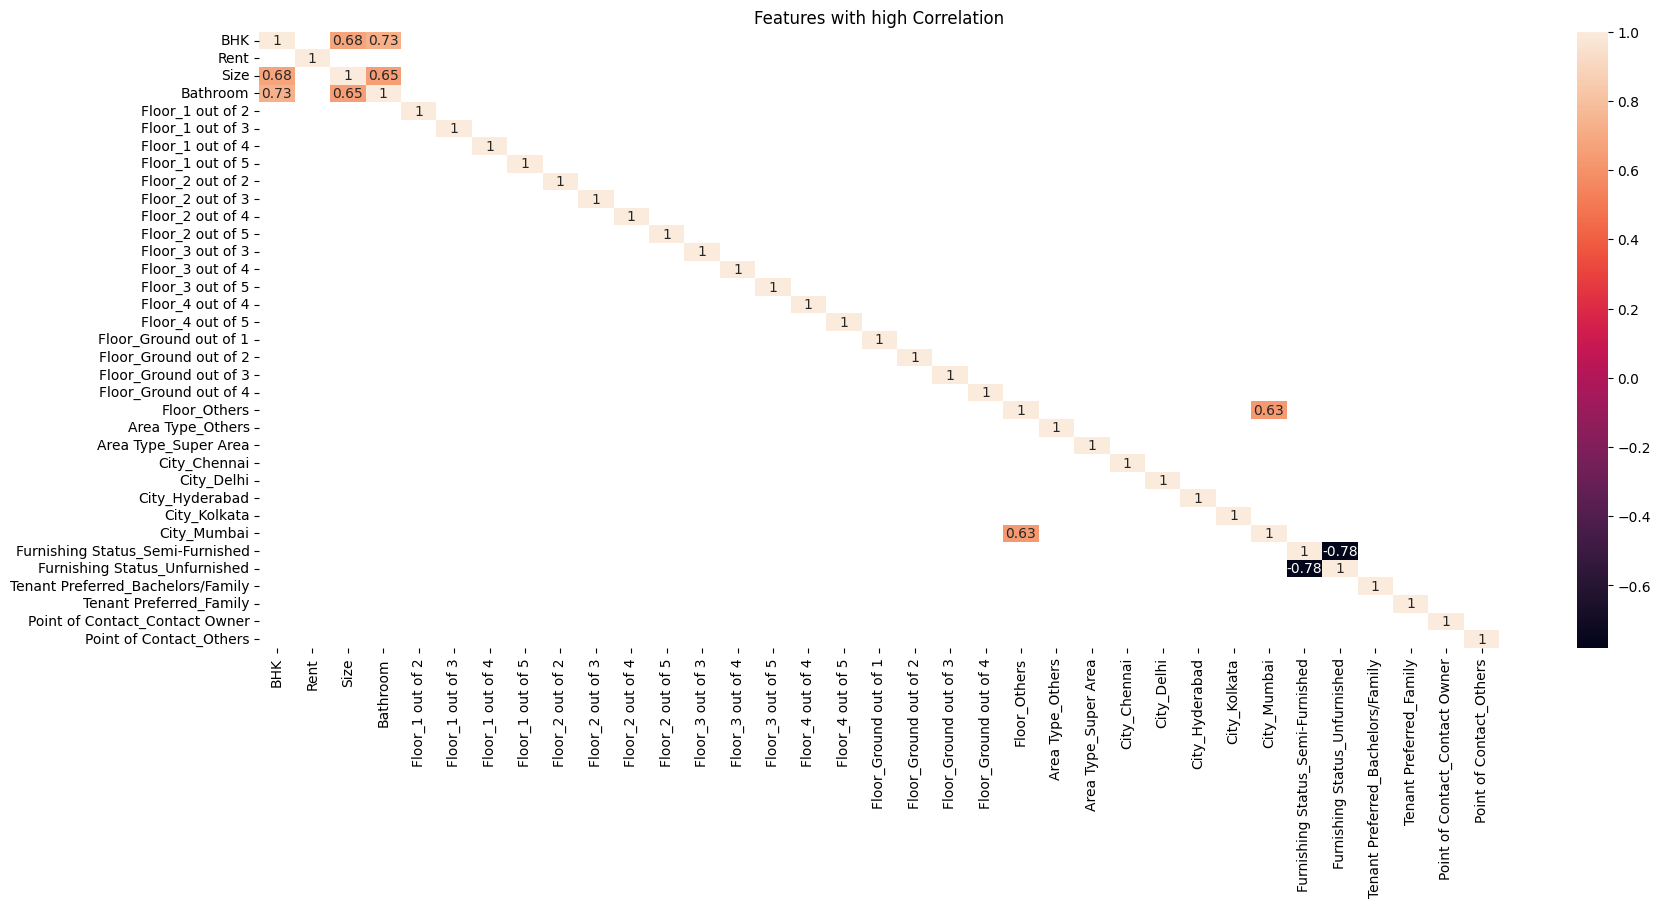

In [28]:
cor=df_encoded_2.corr()
df_cor=cor.copy()                                                               # filtering out feature pairs with high correlation using threshod limit of 0.6
for i in cor.columns:
    df_cor[i] = np.where((cor[i] > 0.60) | (cor[i] < -0.60), round(cor[i],2), np.nan)

plt.figure(figsize=(20,8))
sns.heatmap(df_cor,annot=True)
_=plt.title("Features with high Correlation")

**High correlation with Target Variable (Rent):**

**Positive:**  
- **BHK** (0.68)  
- **Size** (0.65)  
- **Bathroom** (0.73)  


**High Positive Correlation in Features:**

- **BHK** with **Size** and **Bathroom**  
- **Size** with **BHK** and **Bathroom**  
- **Bathroom** with **BHK** and **Size**  


 **High Negative Correlation in Features:**  

- **Area Type (Super Area)** shows slight negative correlations with other features, indicating variation based on area type but no strong impact on rent.  

The strongest factors affecting rent are **BHK, Size, and Bathrooms**, with all three highly intercorrelated.

##(j) Transform features and target using centering and scaling.

In [50]:
numerical_col=df_encoded_1.drop(["Rent"],axis=1).select_dtypes(include="number").columns
from sklearn.model_selection import train_test_split #import the train test split class to split our dataset
from sklearn.preprocessing import StandardScaler #import the dtsnderdscaler class to scaling the features and target variable
scaler_x=StandardScaler()
scaler_y=StandardScaler()
X=df_encoded_1.drop(columns=["Rent"]) #drop our target variable from our dataset
Y=df_encoded_1["Rent"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)


x_train[numerical_col]=scaler_x.fit_transform(x_train[numerical_col])
x_test[numerical_col]=scaler_x.transform(x_test[numerical_col])

y_train = pd.DataFrame(y_train) #transforming tha target ariable using standerd scaling
y_test = pd.DataFrame(y_test)
y_train["Rent"]=scaler_y.fit_transform(y_train)
y_test["Rent"]=scaler_y.transform(y_test)


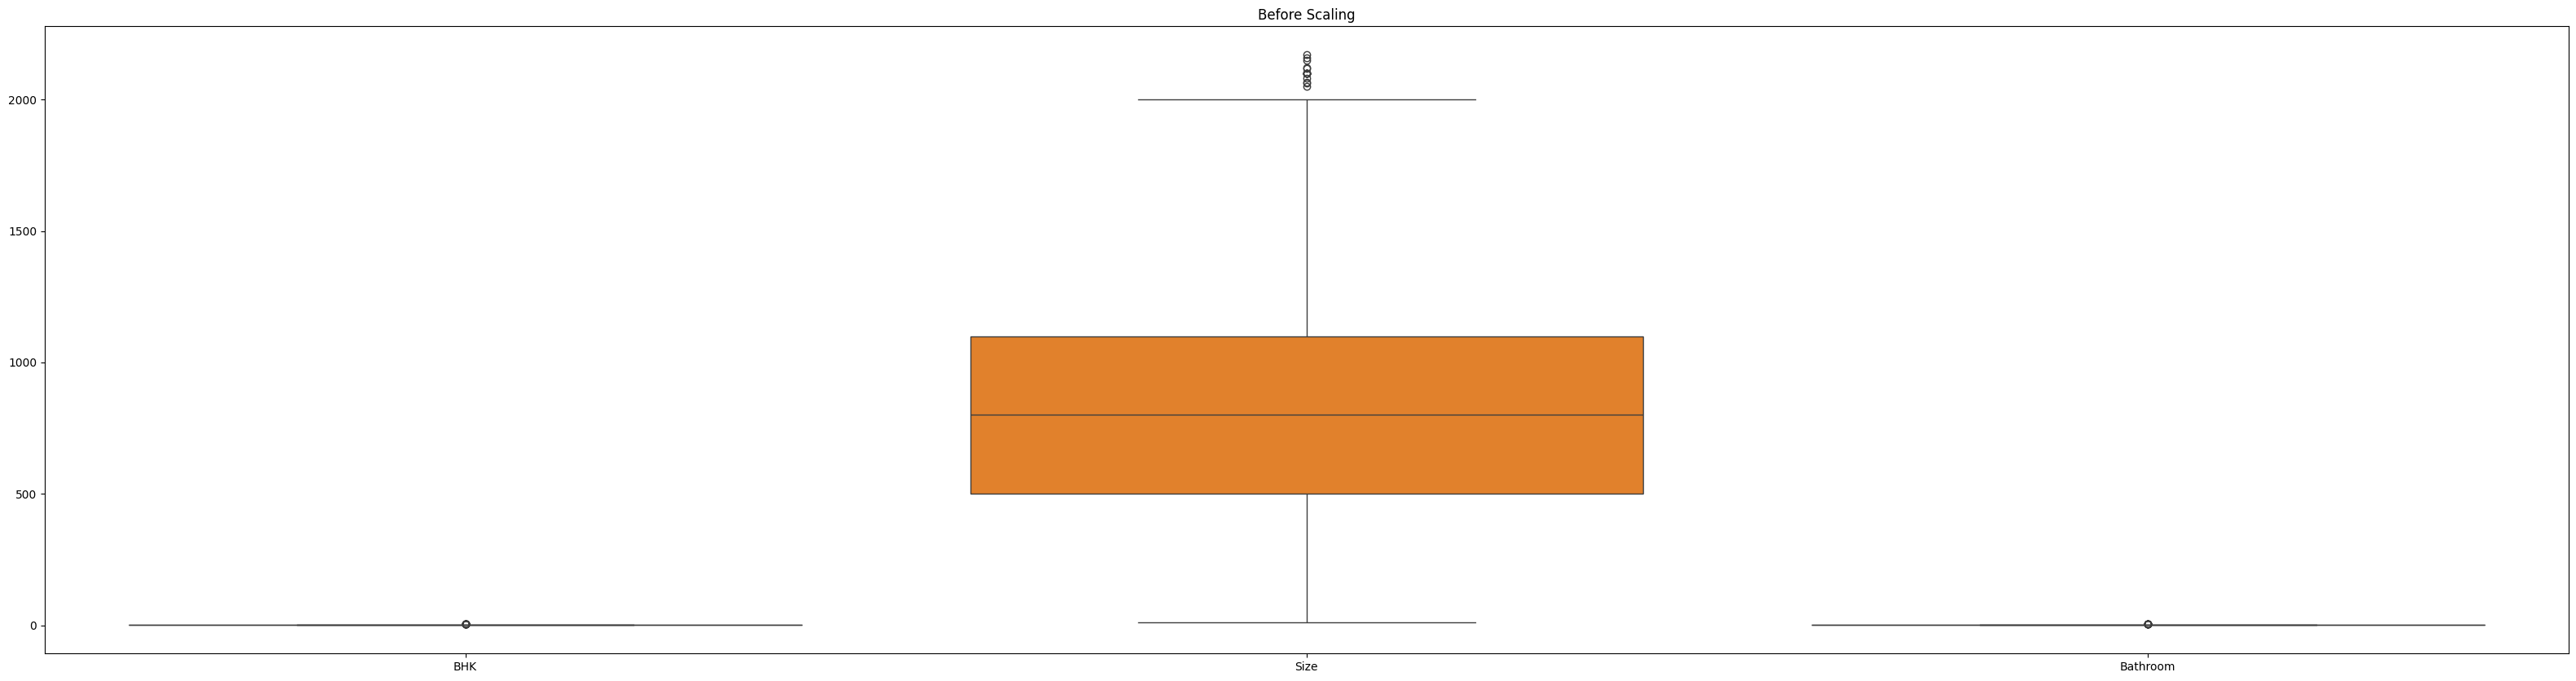

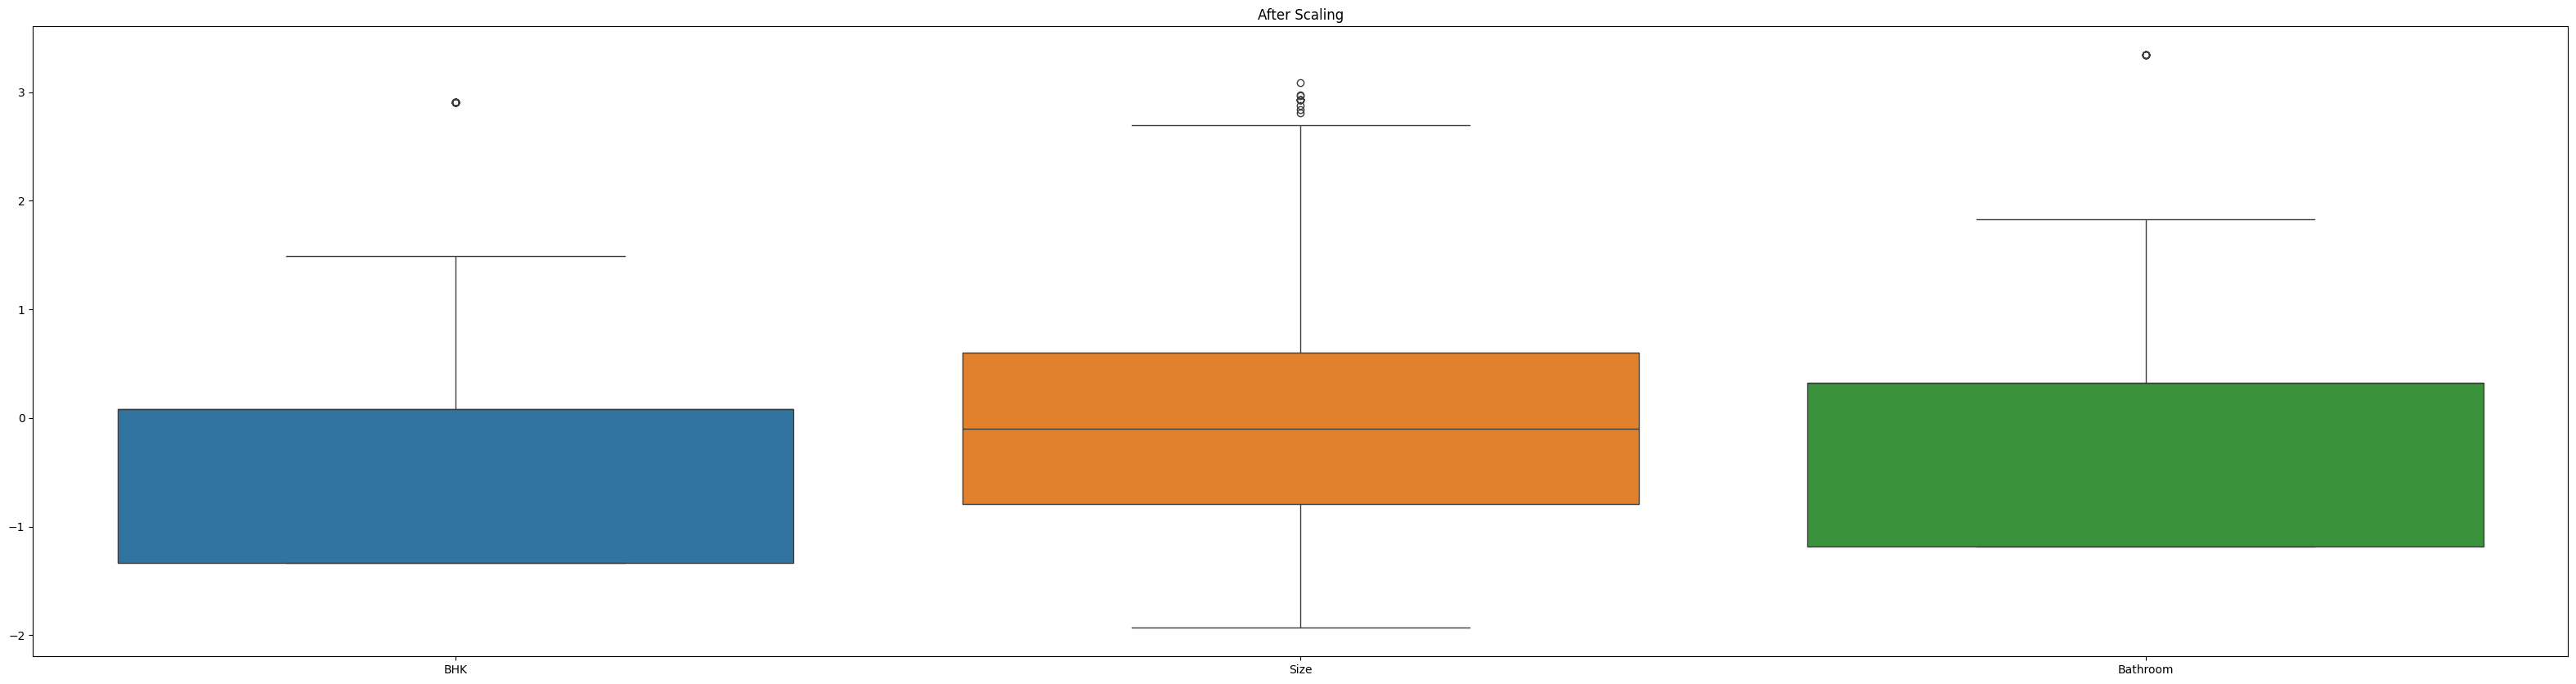

In [30]:
plt.figure(figsize=(40,10))                                            #Plotting Bar graph to visualize Data before and after scaling.
sns.boxplot(df_filt.drop(["Rent"],axis=1))
plt.title("Before Scaling")

plt.figure(figsize=(40,10))
sns.boxplot(x_train[["BHK","Size","Bathroom"]])
_=plt.title("After Scaling")

**Befor and after Centring and scalling.**


In [31]:
numerical_col=df_encoded_2.drop(["Rent"],axis=1).select_dtypes(include="number").columns
from sklearn.model_selection import train_test_split #import the train test split class to split our dataset
from sklearn.preprocessing import StandardScaler #import the dtsnderdscaler class to scaling the features and target variable
scaler_x1=StandardScaler()
scaler_y1=StandardScaler()
X=df_encoded_2.drop(columns=["Rent"]) #drop our target variable from our dataset
Y=df_encoded_2["Rent"]
x_train1,x_test1,y_train1,y_test1=train_test_split(X,Y,test_size=0.3,random_state=10)


x_train1[numerical_col]=scaler_x1.fit_transform(x_train1[numerical_col])
x_test1[numerical_col]=scaler_x1.transform(x_test1[numerical_col])

y_train1 = pd.DataFrame(y_train1) #transforming tha target ariable using standerd scaling
y_test1 = pd.DataFrame(y_test1)
y_train1["Rent"]=scaler_y1.fit_transform(y_train1)
y_test1["Rent"]=scaler_y1.transform(y_test1)


**Scaling and centering binned data.**

In [55]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Define models + hyperparameter grids
models_and_parameters = {
    "LinearRegression": (
        LinearRegression(),
        {"fit_intercept": [True, False]}
    ),
    "Ridge": (
        Ridge(),
        {"alpha": [0.1, 1.0, 10.0, 100.0]}
    ),
    "Lasso": (
        Lasso(),
        {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0]}
    ),
    "DecisionTree": (
        DecisionTreeRegressor(),
        {"max_depth": [None, 5, 10, 20],
         "min_samples_split": [2, 5, 10]}
    ),
    "RandomForest": (
        RandomForestRegressor(),
        {"n_estimators": [50, 100],
         "max_depth": [None, 5, 10],
         "min_samples_split": [2, 5]}
    ),
    "GradientBoosting": (
        GradientBoostingRegressor(),
        {"n_estimators": [50, 100],
         "learning_rate": [0.01, 0.1, 0.2],
         "max_depth": [3, 5]}
    ),
    "AdaBoost": (
        AdaBoostRegressor(),
        {"n_estimators": [50, 100, 200],
         "learning_rate": [0.01, 0.1, 1.0]}
    ),
    "XGBoost": (
        XGBRegressor(verbosity=0, eval_metric='rmse'),
        {"n_estimators": [50, 100, 200],
         "learning_rate": [0.01, 0.1, 0.2],
         "max_depth": [3, 5, 7]}
    )
}

# Store results
results = []

for name, (model, params) in models_and_parameters.items():
    print(f"\nRunning GridSearchCV for {name}...")
    grid = GridSearchCV(
        model,
        params,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    grid.fit(x_train1, y_train1)

    results.append({
        "Model": name,
        "Best RMSE (CV)": -grid.best_score_,   # negate since sklearn returns negative RMSE
        "Best Params": grid.best_params_
    })

# Convert to DataFrame
df_results = pd.DataFrame(results).sort_values(by="Best RMSE (CV)", ascending=True)  # lower RMSE is better





Running GridSearchCV for LinearRegression...

Running GridSearchCV for Ridge...

Running GridSearchCV for Lasso...

Running GridSearchCV for DecisionTree...

Running GridSearchCV for RandomForest...

Running GridSearchCV for GradientBoosting...

Running GridSearchCV for AdaBoost...

Running GridSearchCV for XGBoost...


In [34]:
df_results

,Model,Best RMSE (CV),Best Params
7,XGBoost,0.50,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
5,GradientBoosting,0.51,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
4,RandomForest,0.51,"{'max_depth': None, 'min_samples_split': 5, 'n..."
2,Lasso,0.55,{'alpha': 0.01}
3,DecisionTree,0.57,"{'max_depth': 5, 'min_samples_split': 10}"
6,AdaBoost,0.60,"{'learning_rate': 0.1, 'n_estimators': 50}"
1,Ridge,0.62,{'alpha': 100.0}
0,LinearRegression,0.72,{'fit_intercept': False}


**For Binned data, there is no significant difference inbetween performance of model with and without regularization, indicated that due to categories binning overfitting is avoided.**

In [66]:
from sklearn.metrics import mean_squared_error
model=XGBRegressor(max_depth=5,verbosity=0, eval_metric='rmse',n_estimators=200,learning_rate=0.05)


train_errors=[]
test_errors=[]
score=[]
model_name=[]

model.fit(x_train1,y_train1)
y_pred_test=model.predict(x_test1)
y_pred_train=model.predict(x_train1)
train_error=mean_squared_error(y_train1, y_pred_train)
test_error=mean_squared_error(y_test1, y_pred_test)
accuracy=model.score(x_test1,y_test1)
train_errors.append(train_error)
test_errors.append(test_error)
score.append(accuracy)
model_name.append("XGBoost")


Errors1=pd.DataFrame({"Model":model_name,"Train_Error":train_errors,"Test_Error":test_errors,"Accuracy":score})
Errors1

,Model,Train_Error,Test_Error,Accuracy
0,XGBoost,0.16,0.25,0.73


##(l) Plot training and testing error for both models.

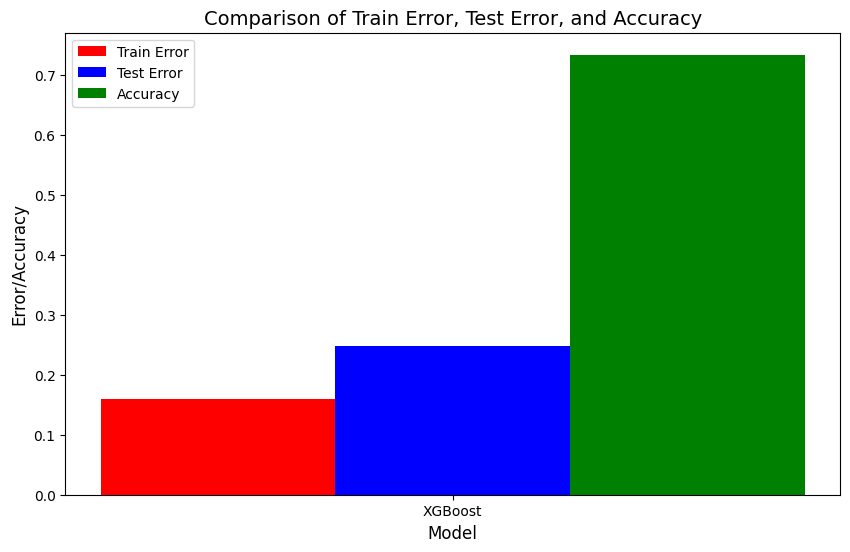

In [63]:
models = Errors1["Model"]
train_error = Errors1["Train_Error"]
test_error = Errors1["Test_Error"]
accuracy = Errors1["Accuracy"]

bar_width = 0.25
x = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, train_error, width=bar_width, label="Train Error", color="red")
plt.bar(x + bar_width, test_error, width=bar_width, label="Test Error", color="blue")
plt.bar(x + 2 * bar_width, accuracy, width=bar_width, label="Accuracy", color="green")

plt.xlabel("Model", fontsize=12)
plt.ylabel("Error/Accuracy", fontsize=12)
plt.title("Comparison of Train Error, Test Error, and Accuracy", fontsize=14)
plt.xticks(x + bar_width, models)
plt.legend()
plt.grid(axis="y", linestyle="-", alpha=0.6)
plt.grid(False)
plt.show()


In [65]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define ANN model
ann = MLPRegressor(max_iter=1000, random_state=42)

# Define parameter grid
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (100,50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "lbfgs"],
    "learning_rate_init": [0.001, 0.01]
}

# GridSearch with neg_root_mean_squared_error
grid_search = GridSearchCV(
    ann,
    param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(x_train1, y_train)

# Get best model
best_ann = grid_search.best_estimator_

# Predictions
y_pred = best_ann.predict(x_test1)

# RMSE
rmse = mean_squared_error(y_test1, y_pred)

# Create results DataFrame
results = pd.DataFrame({
    "Model": ["ANN (MLPRegressor)"],
    "Best Params": [grid_search.best_params_],
    "CV Score (Best Neg RMSE)": [grid_search.best_score_],
    "Test RMSE": [rmse]
})

print(results)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
                Model                                        Best Params  \
0  ANN (MLPRegressor)  {'activation': 'relu', 'hidden_layer_sizes': (...   

   CV Score (Best Neg RMSE)  Test RMSE  
0                     -0.59       0.30  


In [68]:
results

,Model,Best Params,CV Score (Best Neg RMSE),Test RMSE
0,ANN (MLPRegressor),"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.59,0.30


In [92]:
train_errors_ann=[]
test_errors_ann=[]
score_ann=[]
model_name_ann=[]

model_ann = MLPRegressor(
    hidden_layer_sizes=(10),  # 2 hidden layers with 100 and 50 neurons
    activation="relu",             # activation function: relu, tanh, logistic
    solver="adam",                 # optimizer: adam, sgd, lbfgs
    learning_rate_init=0.01,      # learning rate
    max_iter=1000,                 # epochs (iterations)
    random_state=42
)

# Fit model
ann.fit(x_train1, y_train)

# Predict
y_pred = ann.predict(x_test1)

model_ann.fit(x_train1,y_train1)
y_pred_test_ann=model_ann.predict(x_test1)
y_pred_train_ann=model_ann.predict(x_train1)
train_error_ann=mean_squared_error(y_train1, y_pred_train_ann)
test_error_ann=mean_squared_error(y_test1, y_pred_test_ann)
accuracy_ann=model_ann.score(x_test1,y_test1)
train_errors_ann.append(train_error_ann)
test_errors_ann.append(test_error_ann)
score_ann.append(accuracy_ann)
model_name_ann.append("ANN Model")

In [93]:
Errors2=pd.DataFrame({"Model":model_name_ann,"Train_Error":train_errors_ann,"Test_Error":test_errors_ann,"Accuracy":score_ann})
Errors2

,Model,Train_Error,Test_Error,Accuracy
0,ANN Model,0.23,0.27,0.71


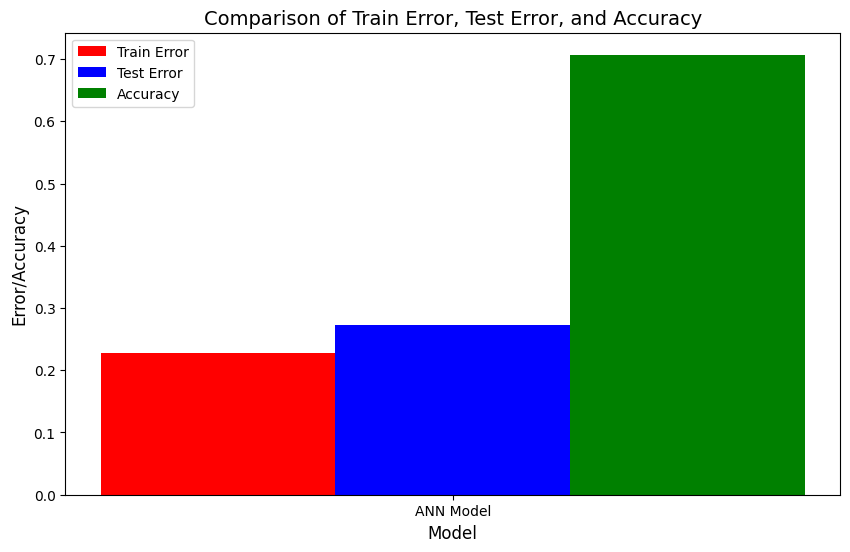

In [94]:
ann_model = Errors2["Model"]
train_error_ann = Errors2["Train_Error"]
test_error_ann = Errors2["Test_Error"]
accuracy_ann = Errors2["Accuracy"]

bar_width = 0.25
x = np.arange(len(ann_model))

plt.figure(figsize=(10, 6))
plt.bar(x, train_error_ann, width=bar_width, label="Train Error", color="red")
plt.bar(x + bar_width, test_error_ann, width=bar_width, label="Test Error", color="blue")
plt.bar(x + 2 * bar_width, accuracy_ann, width=bar_width, label="Accuracy", color="green")

plt.xlabel("Model", fontsize=12)
plt.ylabel("Error/Accuracy", fontsize=12)
plt.title("Comparison of Train Error, Test Error, and Accuracy", fontsize=14)
plt.xticks(x + bar_width, ann_model)
plt.legend()
plt.grid(axis="y", linestyle="-", alpha=0.6)
plt.grid(False)
plt.show()